In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

## Load The Dataset

In [3]:
# Import the data 

df = pd.read_csv("netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


## Data Structure 

In [5]:
# Shape of the data

print(f"The shape of the data is : {df.shape}")

The shape of the data is : (8790, 10)


In [6]:
# Checking data types

df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [7]:
# statistical summary of the non-numerical columns
df.describe(include = object)

,show_id,type,title,director,country,date_added,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790,8790,8790
unique,8790,2,8787,4528,86,1713,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,3205,1791,362


In [8]:
# statistical summary of the numerical columns
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Data Cleaning

In [10]:
# Checking duplicate values

df.duplicated().sum()

0

In [11]:
# Checking null values

df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [12]:
# Converting date_added column into datetime format 
df["date_added"] = pd.to_datetime(df["date_added"])

# Checking updated data types
df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [13]:
# statistical summary of the non-numerical columns
df.describe(include = object)

,show_id,type,title,director,country,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790,8790
unique,8790,2,8787,4528,86,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,3205,1791,362


In [14]:
# statistical summary of the numerical columns
df.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [15]:
# Overall summary of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [16]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


## Exploratary Data Analysis (EDA)

In [18]:
# Total number of contents provided by netflix

df["type"].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

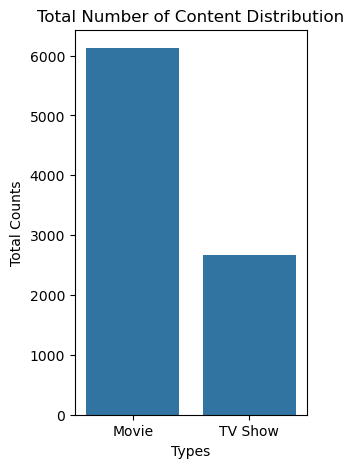

In [19]:
# Plot the countplot for total content on netflix 

plt.figure(figsize = (3,5))
sns.countplot(data = df, x = df["type"])
plt.title("Total Number of Content Distribution")
plt.xlabel("Types")
plt.ylabel("Total Counts")
plt.show()

In [20]:
# Count of ratings 

top_rating = df["rating"].value_counts().reset_index()
top_rating

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


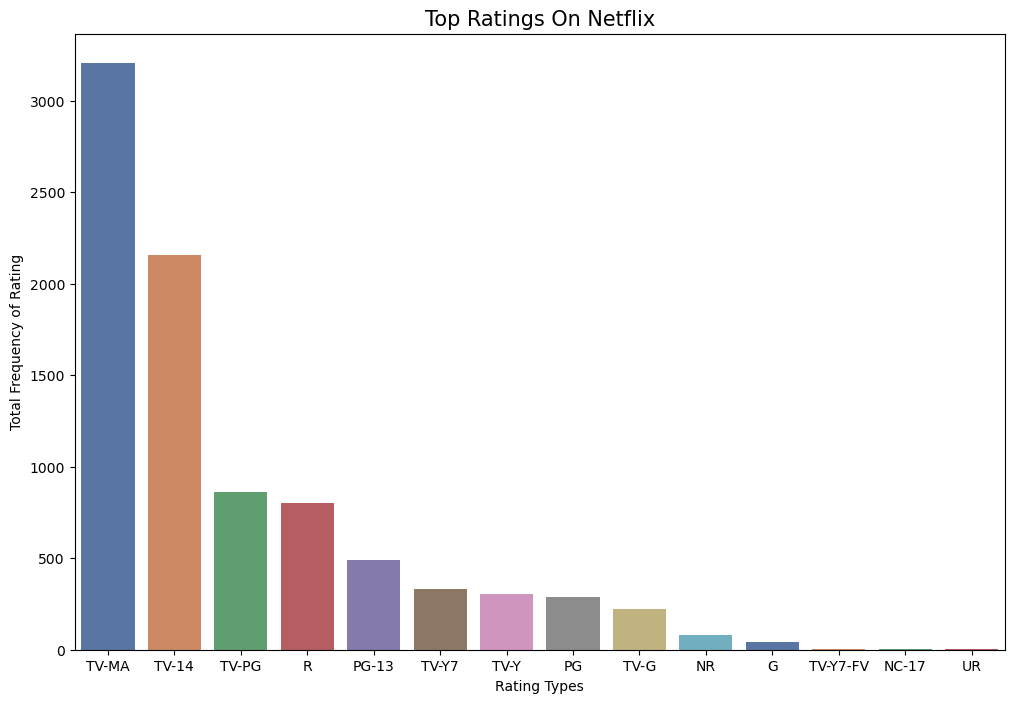

In [21]:
# Plotting Top ratings on netflix

plt.figure(figsize = (12,8))
sns.barplot(x = top_rating["rating"], y = top_rating["count"],palette = "deep")
plt.title("Top Ratings On Netflix",fontsize = 15)
plt.xlabel("Rating Types")
plt.ylabel("Total Frequency of Rating")
plt.show()

In [22]:
# Figuring which genres is most watched on netflix

df['genres'] = df['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(df['genres'],[])
genre_counts = pd.Series(all_genres).value_counts().head(10)

In [23]:
genre_counts

 International Movies     2624
Dramas                    1599
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     773
 Independent Movies        736
 TV Dramas                 695
 Romantic Movies           613
Name: count, dtype: int64

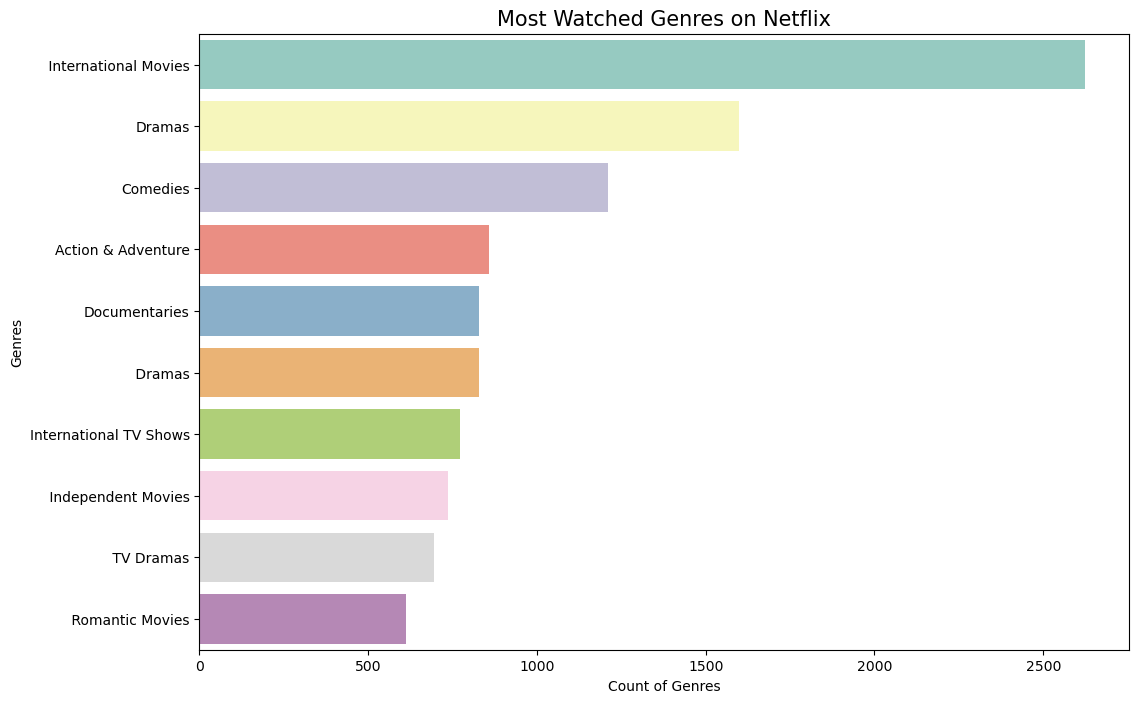

In [24]:
# Plotting most watched genres on netflix

plt.figure(figsize = (12, 8))
sns.barplot(x = genre_counts.values, y = genre_counts.index,
            palette = "Set3")
plt.title('Most Watched Genres on Netflix', fontsize = 15)
plt.xlabel('Count of Genres')
plt.ylabel('Genres')
plt.show()

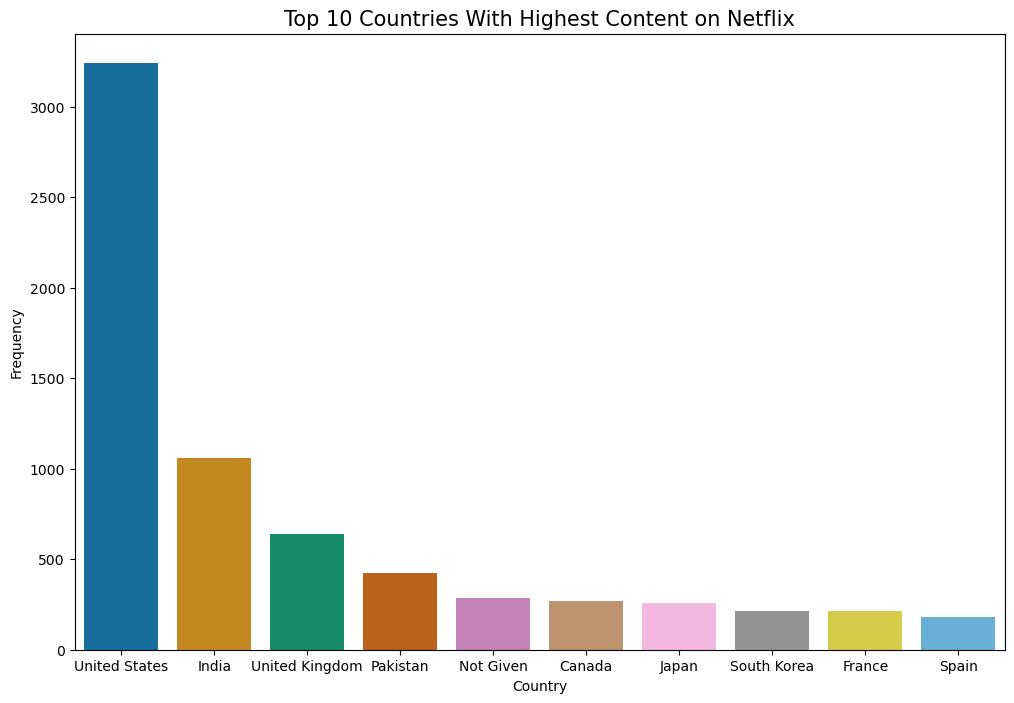

In [25]:
# Top countries with highest number of content on netflix

country_content = df["country"].value_counts().reset_index().head(10)

# plotting top 10 countries with most number of content on netflix

plt.figure(figsize = (12,8))
sns.barplot(x = country_content["country"], y = country_content["count"],
            palette = "colorblind")
plt.title("Top 10 Countries With Highest Content on Netflix", fontsize = 15)
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.show()

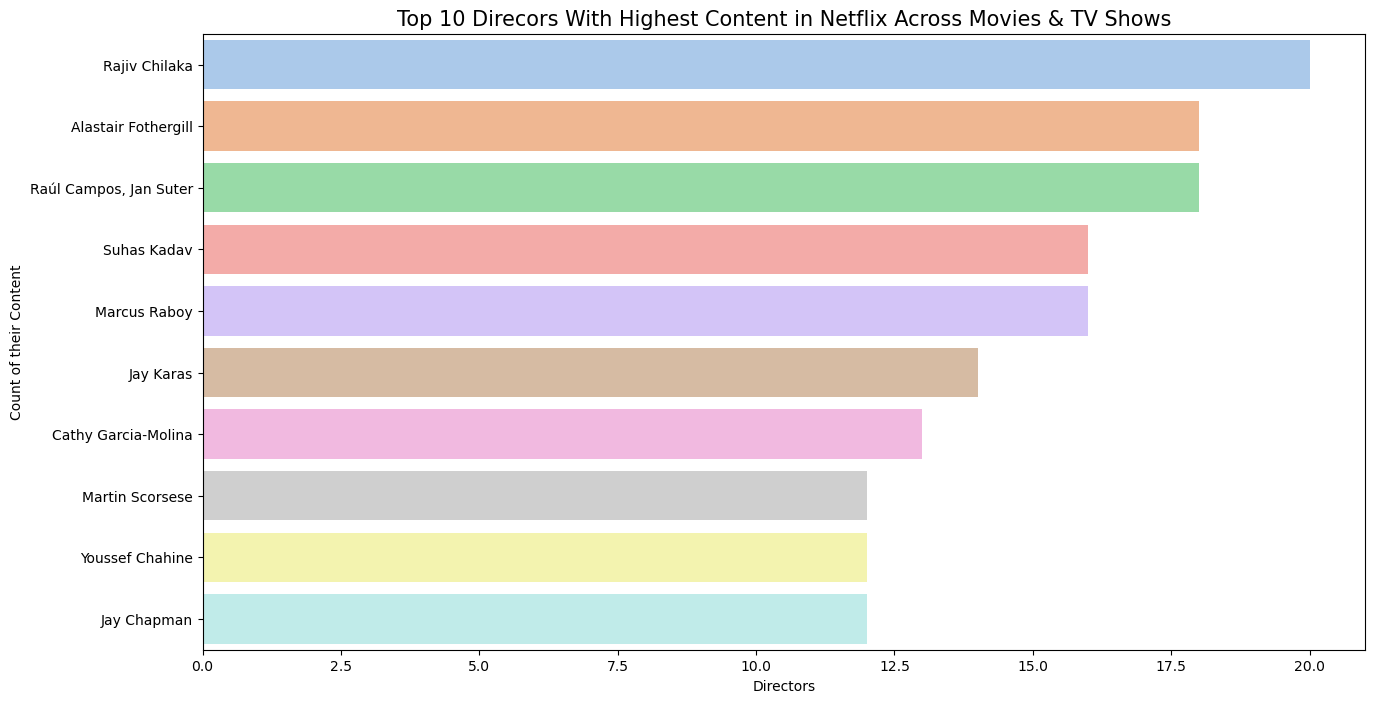

In [26]:
# Top dicrector on netflix with most number of content across movies and tv shows 

top_directors = df["director"].value_counts()[1:11].reset_index()

# Plotting top 10 director with most number of content on netflix across movies and tv shows

plt.figure(figsize = (15,8))
sns.barplot(x = top_directors["count"], y = top_directors["director"],palette = "pastel")
plt.title("Top 10 Direcors With Highest Content in Netflix Across Movies & TV Shows", fontsize = 15)
plt.xlabel("Directors")
plt.ylabel("Count of their Content")
plt.show()

In [27]:
# Most popular genres of movies on netflix 

movie = df[df["type"] == "Movie"]
top_movie_genres = movie["listed_in"].value_counts().reset_index().sort_values(by = "count",ascending = False).head(10)
top_movie_genres

,listed_in,count
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252
5,Children & Family Movies,215
6,"Children & Family Movies, Comedies",201
7,"Documentaries, International Movies",186
8,"Dramas, International Movies, Romantic Movies",180
9,"Comedies, International Movies",176


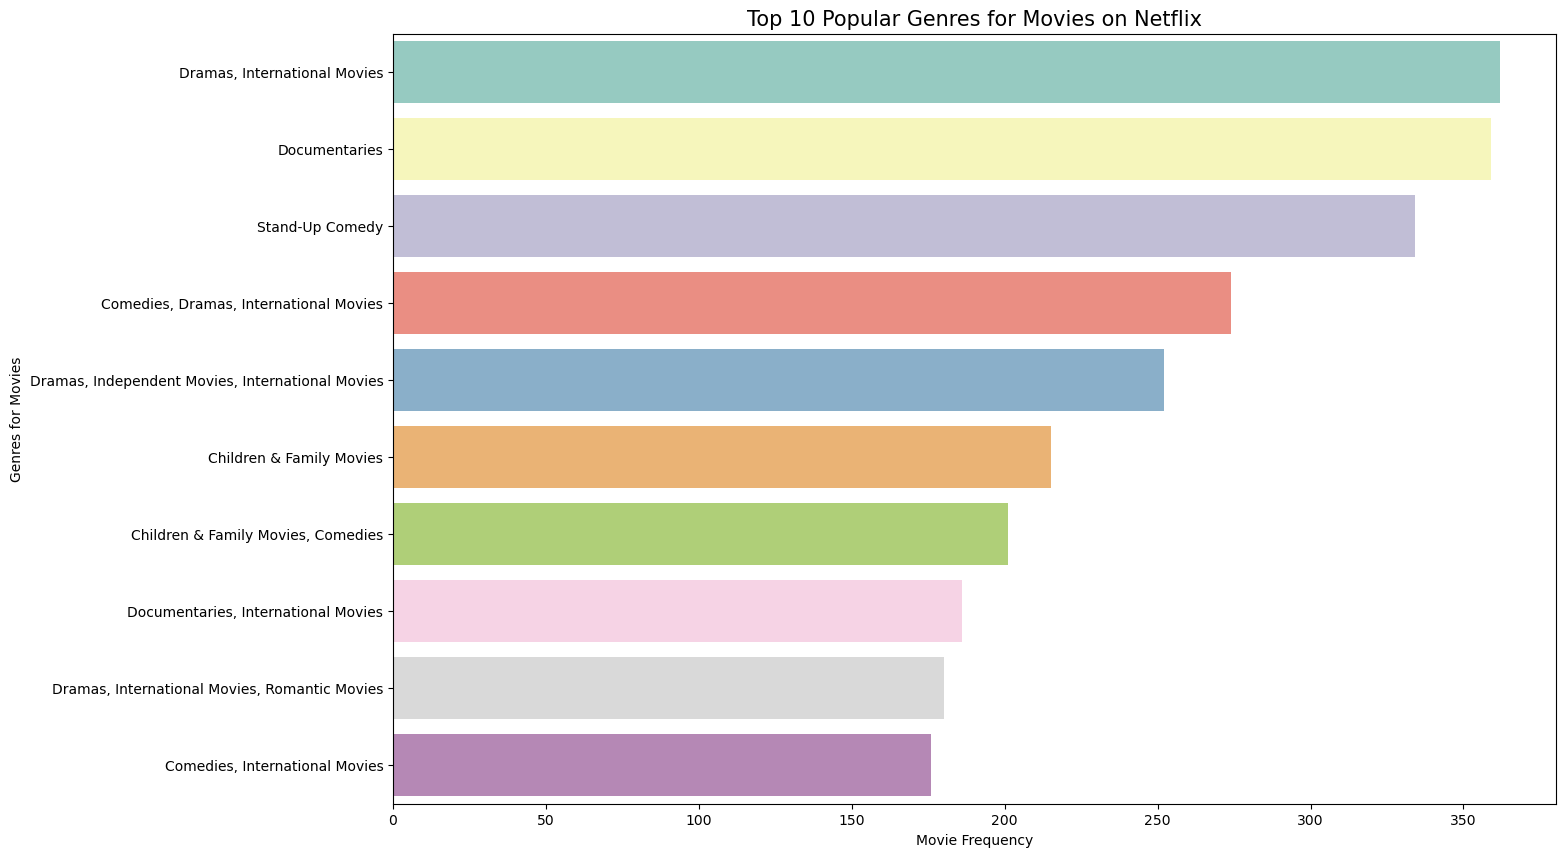

In [28]:
# Plotting top 10 most popular genres for movies presented on netflix 

plt.figure(figsize = (15,10))
sns.barplot(x = top_movie_genres["count"], y = top_movie_genres["listed_in"],
           palette  = "Set3")
plt.title("Top 10 Popular Genres for Movies on Netflix",fontsize = 15)
plt.xlabel("Movie Frequency")
plt.ylabel("Genres for Movies")
plt.show()

In [29]:
# Most popular genres of tv shows on netflix 

tv_show = df[df["type"] == "TV Show"].groupby("listed_in").size().sort_values(ascending = False).head(10)
tv_show

listed_in
Kids' TV                                                  219
International TV Shows, TV Dramas                         121
Crime TV Shows, International TV Shows, TV Dramas         110
Kids' TV, TV Comedies                                      97
Reality TV                                                 95
International TV Shows, Romantic TV Shows, TV Comedies     94
International TV Shows, Romantic TV Shows, TV Dramas       90
Anime Series, International TV Shows                       87
Docuseries                                                 84
TV Comedies                                                68
dtype: int64

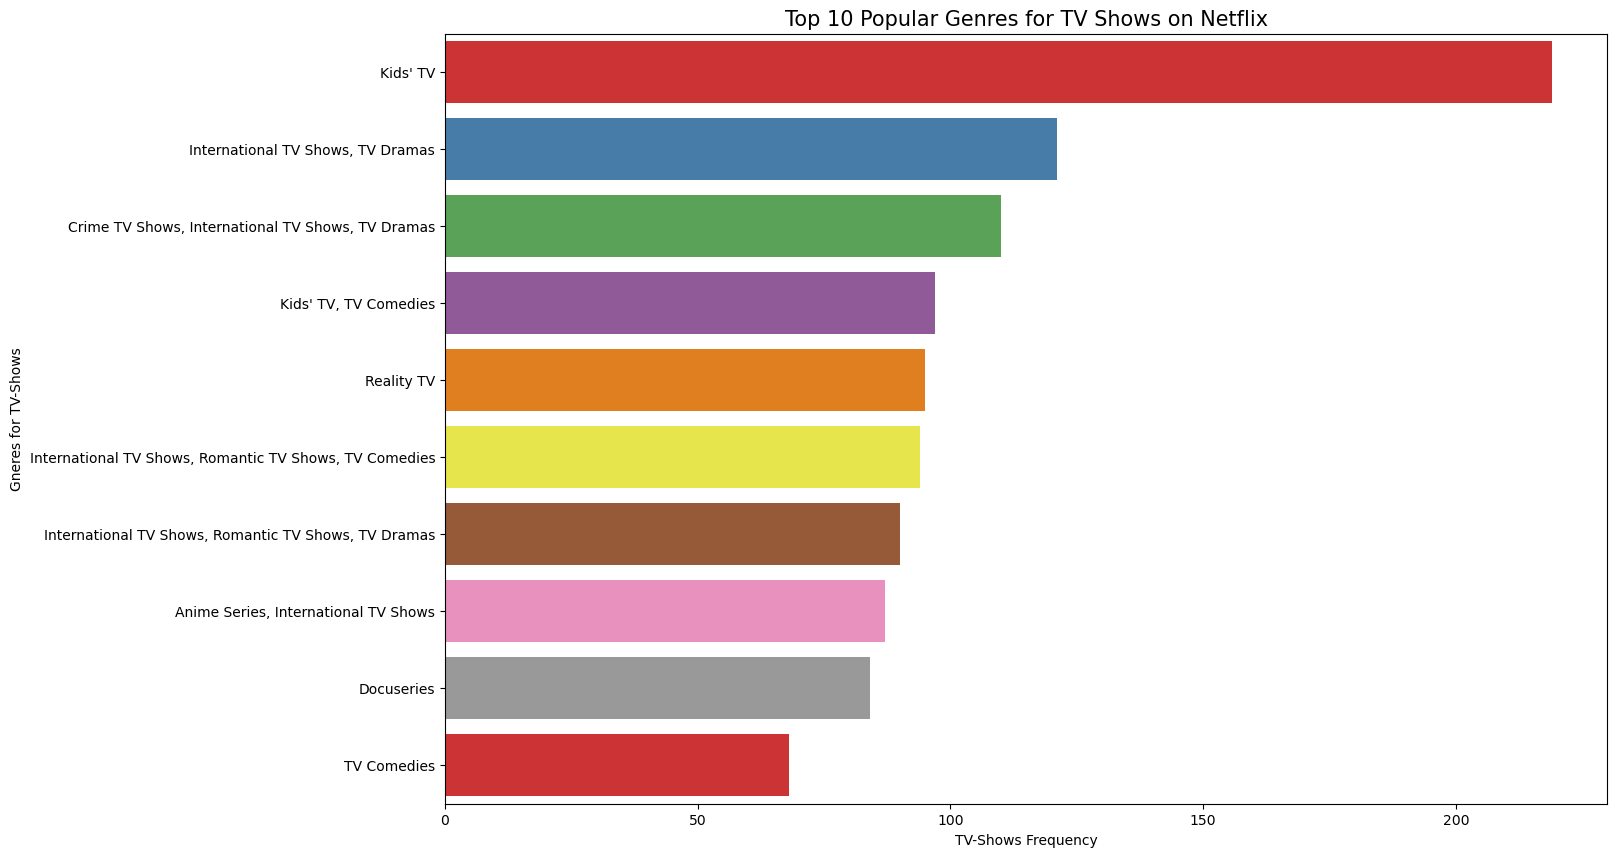

In [30]:
# Plotting top 10 most popular genres for tv shows presented on netflix 

plt.figure(figsize = (15,10))
sns.barplot(y = tv_show.index,x = tv_show.values,palette = "Set1")
plt.title("Top 10 Popular Genres for TV Shows on Netflix",fontsize = 15)
plt.xlabel("TV-Shows Frequency")
plt.ylabel("Gneres for TV-Shows")
plt.show()

In [31]:
# Seperating years,months and dates from date_added (whole date)

df["year"] = df["date_added"].dt.year
df["month"] = df["date_added"].dt.month
df["day"] = df["date_added"].dt.day

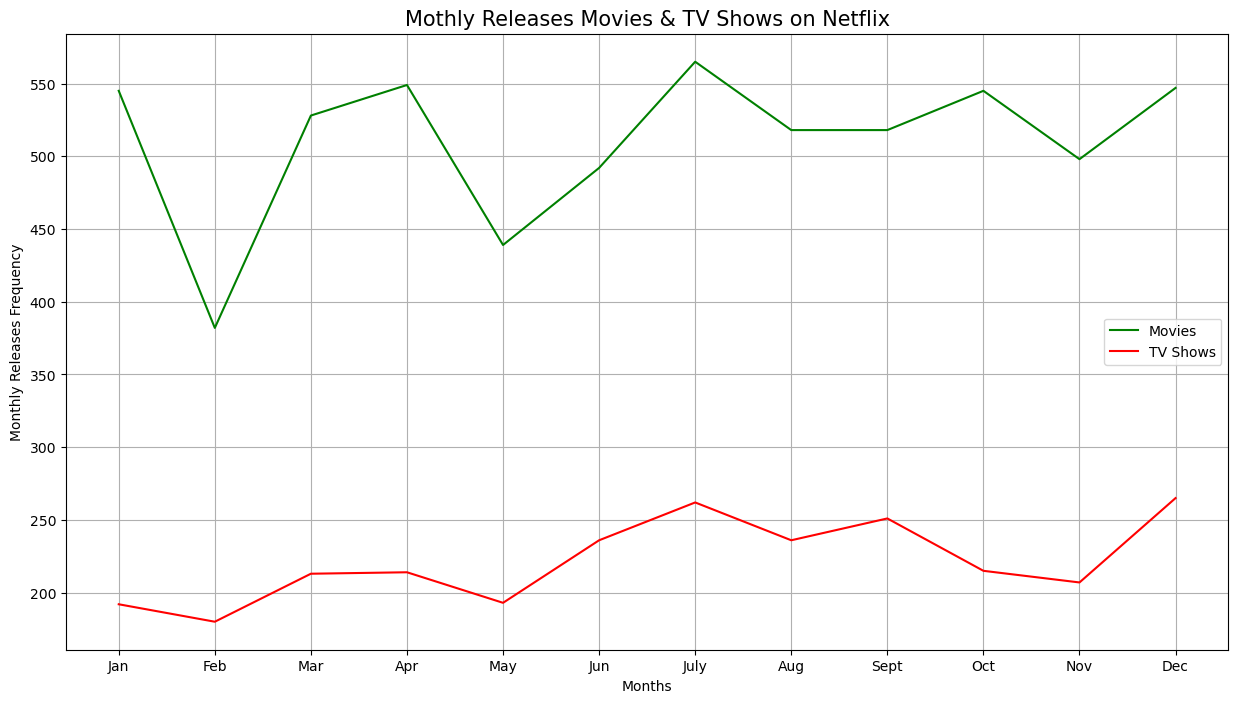

In [32]:
# Plotting the monthly releases of movies and tv shows 

monthly_release_movies = df[df["type"] == "Movie"]["month"].value_counts().sort_index()
monthly_release_tv_shows = df[df["type"] == "TV Show"]["month"].value_counts().sort_index()

plt.figure(figsize = (15,8))
sns.lineplot(x = monthly_release_movies.index, y = monthly_release_movies.values,
             label = "Movies",color = "green")
sns.lineplot(x = monthly_release_tv_shows.index, y= monthly_release_tv_shows.values,
             label  = "TV Shows",color = "red")
plt.title("Mothly Releases Movies & TV Shows on Netflix", fontsize = 15)
plt.xlabel("Months")
plt.xticks(range(1,13),["Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sept","Oct","Nov","Dec"])
plt.ylabel("Monthly Releases Frequency")
plt.legend(loc = "center right")
plt.grid(True)
plt.show()

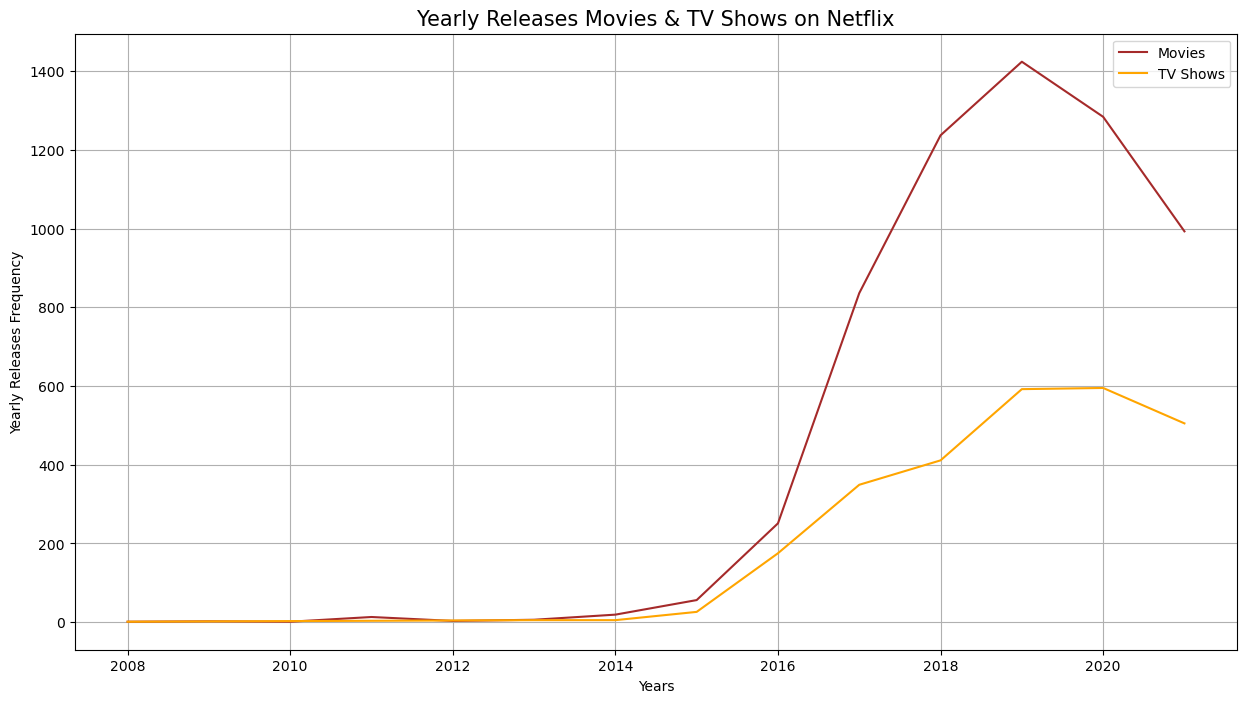

In [33]:
# Plotting the yearly releases of movies and tv shows

yearly_release_movie = df[df["type"] == "Movie"]["year"].value_counts().sort_index()
yearly_release_tv_show =df[df["type"] == "TV Show"]["year"].value_counts().sort_index()

plt.figure(figsize = (15,8))
sns.lineplot(x = yearly_release_movie.index, y =  yearly_release_movie.values,
             label = "Movies",color = "brown")
sns.lineplot(x = yearly_release_tv_show.index, y = yearly_release_tv_show.values,
             label = "TV Shows", color = "orange")
plt.title("Yearly Releases Movies & TV Shows on Netflix", fontsize = 15)
plt.xlabel("Years")
plt.ylabel("Yearly Releases Frequency")
plt.grid(True)
plt.show()

## Feature Engineering

In [35]:
netflix_df = pd.DataFrame(df[["type","release_year","rating","duration","listed_in"]])

In [36]:
netflix_df.head()

,type,release_year,rating,duration,listed_in
0,Movie,2020,PG-13,90 min,Documentaries
1,TV Show,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [37]:
# duration time in seperated numbers: works for "90 min", "2 Seasons" ; 90, 2
netflix_df["duration_time"] = netflix_df["duration"].str.extract(r"(\d+)").astype(int)

In [38]:
# shows it's season or not!
netflix_df["is_season"] = netflix_df["duration"].str.contains("Season").astype(int)

In [39]:
# number of genres ; count
netflix_df["cnt_genres"] = netflix_df["listed_in"].str.count(",") + 1

In [40]:
# encoding
le = LabelEncoder()

# encode rating
netflix_df["rating_enc"] = le.fit_transform(netflix_df["rating"])

# encode type (Movie / TV Show)
netflix_df["type_enc"] = le.fit_transform(netflix_df["type"])

In [41]:
netflix_df.head()

,type,release_year,rating,duration,listed_in,duration_time,is_season,cnt_genres,rating_enc,type_enc
0,Movie,2020,PG-13,90 min,Documentaries,90,0,1,4,0
1,TV Show,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1,1,3,8,1
2,TV Show,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1,1,3,8,1
3,Movie,2021,TV-PG,91 min,"Children & Family Movies, Comedies",91,0,2,9,0
4,Movie,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125,0,3,8,0


## Modeling

In [43]:
# independent cols
features = ["release_year", "duration_time", "is_season",
                "cnt_genres", "rating_enc"]

In [44]:
# assing independent and dependent variable
X = netflix_df[features]
y = netflix_df["type_enc"]

In [45]:
# splitting data into train and test

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=77,
    stratify=y
)

In [46]:
# applying model 
rf_model = RandomForestClassifier(n_estimators=200, random_state=77, n_jobs=-1)

# fitting the data 
rf_model.fit(X_train, y_train)

# predicting the testing/unseen data
y_pred = rf_model.predict(X_test)

## Evaluation 

In [48]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

print("\nClassification report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification report:

              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1225
     TV Show       1.00      1.00      1.00       533

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758

Confusion matrix:
[[1225    0]
 [   0  533]]


## Insights

- TV Shows experienced a **notable rise in popularity from 2018 to 2020**, as shown in the yearly content release trend where **TV Show growth steepened during those years.**

- The **United States** produces the **highest** number of Netflix titles, followed by India, with “International Movies” being the most common listed genre.

- **TV-MA (adult-rated)** content is the **most prevalent** rating on Netflix, **indicating a strong focus toward mature audiences.**

- **Movies make up the majority of content** on Netflix, but **TV Shows are expanding at a faster rate, especially in recent years.**

- Duration **format—minutes vs seasons**—creates a clear distinction between Movies and TV Shows, enabling **highly accurate** ML classification using simple metadata.